In [1]:
import sys
sys.path.append("..")

In [2]:
from library.simulator import BackTester, Runner
from library.strategy import TestStrategy, RunnerwithStrategy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# CSVデータを読み込む
df = pd.read_csv(
    "../input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 60}
tester = BackTester(df, config)
strategy = TestStrategy(df)
runner = RunnerwithStrategy(tester=tester, strategy=strategy)
runner.run()
snapshots = tester.snapshots
print(snapshots)

                              cash  position     valuation
timestamp                                                 
2023-01-26 21:45:00  1000000.00000  0.000000  1.000000e+06
2023-01-26 22:00:00  1000000.00000  0.000000  1.000000e+06
2023-01-26 22:15:00  1000000.00000  0.000000  1.000000e+06
2023-01-26 22:30:00  1000000.00000  0.000000  1.000000e+06
2023-01-26 22:45:00  1000000.00000  0.000000  1.000000e+06
...                            ...       ...           ...
2023-04-04 02:45:00   139191.04496  0.275468  1.162371e+06
2023-04-04 03:00:00   139191.04496  0.275468  1.160141e+06
2023-04-04 03:15:00   139191.04496  0.275468  1.160738e+06
2023-04-04 03:30:00   139191.04496  0.275468  1.163653e+06
2023-04-04 03:45:00   139191.04496  0.275468  1.162121e+06

[6454 rows x 3 columns]


In [9]:
for order in tester.archived_orders:
    print(order.__dict__)

{'id': 0, 'timestamp': Timestamp('2023-01-27 05:15:00'), 'side': 'BUY', 'size': 0.003365925590829334, 'completion_time': Timestamp('2023-01-27 05:30:00'), 'completion_status': 'executed'}
{'id': 1, 'timestamp': Timestamp('2023-01-27 05:15:00'), 'side': 'SELL', 'size': 0.003365925590829334, 'completion_time': Timestamp('2023-01-27 06:45:00'), 'completion_status': 'expired'}
{'id': 2, 'timestamp': Timestamp('2023-01-27 13:45:00'), 'side': 'BUY', 'size': 0.003319952482606352, 'completion_time': Timestamp('2023-01-27 14:00:00'), 'completion_status': 'executed'}
{'id': 3, 'timestamp': Timestamp('2023-01-27 13:45:00'), 'side': 'SELL', 'size': 0.003319952482606352, 'completion_time': Timestamp('2023-01-27 15:15:00'), 'completion_status': 'expired'}
{'id': 4, 'timestamp': Timestamp('2023-01-27 15:45:00'), 'side': 'BUY', 'size': 0.003263498004021401, 'completion_time': Timestamp('2023-01-27 16:00:00'), 'completion_status': 'executed'}
{'id': 5, 'timestamp': Timestamp('2023-01-27 15:45:00'), 'si

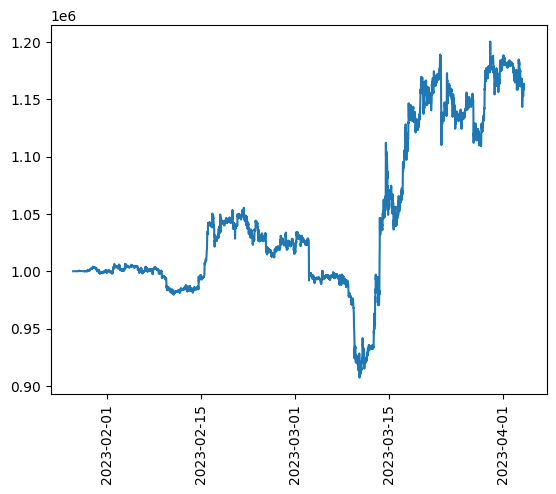

In [4]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["valuation"])
plt.show()

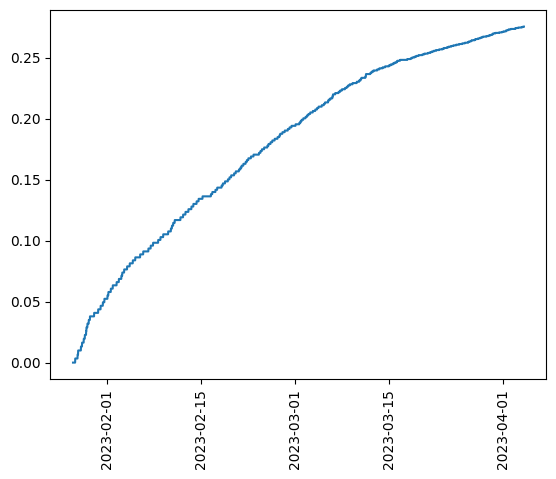

In [5]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["position"])
plt.show()